In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CreditRiskData=pd.read_csv('case_study_data.csv', encoding='latin')
print('Shape before deleting duplicate values:', CreditRiskData.shape)

# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


checkin_acc  duration credit_history purpose  amount svaing_acc  \
0         A11         9            A34     A43    1754        A65   
1         A12        72            A32     A43    8927        A61   
2         A14        18            A34     A46    3144        A61   
3         A11        63            A32     A42   11823        A61   
4         A11        36            A33     A40    7305        A61   
5         A14        54            A32     A46   13583        A65   
6         A14        36            A32     A42    4253        A63   
7         A12        54            A32     A41   10422        A61   
8         A14        18            A32     A43    4589        A64   
9         A12        45            A34     A40    7851        A61   

  present_emp_since  inst_rate personal_status other_debtors  ...  property  \
0               A75          6             A93          A101  ...      A121   
1               A73          3             A92          A101  ...      A121   
2               A74          3             A93          A101  ...      A121   
3               A74          3             A93          A103  ...      A122   
4               A73          5             A93          A101  ...      A124   
5               A73          3             A93          A101  ...      A124   
6               A75          5             A93          A101  ...      A122   
7               A73          3             A93          A101  ...      A123   
8               A74          3             A91          A101  ...      A121   
9               A71          6             A94          A101  ...      A123   

   age  inst_plans housing num_credits   job dependents  telephone  \
0  101        A143    A152           3  A173          2       A192   
1   33        A143    A152           2  A173          2       A191   
2   74        A143    A152           2  A172          3       A191   
3   68        A143    A153           2  A173          3       A191   
4   80        A143    A153           3  A173          3       A191   
5   53        A143    A153           2  A172          3       A192   
6   80        A143    A152           2  A173          2       A191   
7   53        A143    A151           2  A174          2       A192   
8   92        A143    A152           2  A172          2       A191   
9   42        A143    A152           3  A174          2       A191   

  foreign_worker status  
0           A201      1  
1           A201      2  
2           A201      1  
3           A201      1  
4           A201      2  
5           A201      1  
6           A201      1  
7           A201      1  
8           A201      1  
9           A201      2  

[10 rows x 21 columns]

Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

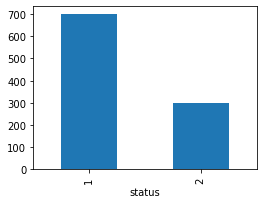

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=CreditRiskData.groupby('status').size()
GroupedData.plot(kind='bar', figsize=(4,3))

Basic Data Exploration

In [4]:
# Looking at the sample rows in the data
CreditRiskData.head()

checkin_acc  duration credit_history purpose  amount svaing_acc  \
0         A11         9            A34     A43    1754        A65   
1         A12        72            A32     A43    8927        A61   
2         A14        18            A34     A46    3144        A61   
3         A11        63            A32     A42   11823        A61   
4         A11        36            A33     A40    7305        A61   

  present_emp_since  inst_rate personal_status other_debtors  ...  property  \
0               A75          6             A93          A101  ...      A121   
1               A73          3             A92          A101  ...      A121   
2               A74          3             A93          A101  ...      A121   
3               A74          3             A93          A103  ...      A122   
4               A73          5             A93          A101  ...      A124   

   age  inst_plans housing num_credits   job dependents  telephone  \
0  101        A143    A152           3  A173          2       A192   
1   33        A143    A152           2  A173          2       A191   
2   74        A143    A152           2  A172          3       A191   
3   68        A143    A153           2  A173          3       A191   
4   80        A143    A153           3  A173          3       A191   

  foreign_worker status  
0           A201      1  
1           A201      2  
2           A201      1  
3           A201      1  
4           A201      2  

[5 rows x 21 columns]

In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
CreditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [6]:
# Looking at the descriptive statistics of the data
CreditRiskData.describe(include='all')

checkin_acc     duration credit_history purpose        amount  \
count         1000  1000.000000           1000    1000   1000.000000   
unique           4          NaN              5      10           NaN   
top            A14          NaN            A32     A43           NaN   
freq           394          NaN            530     280           NaN   
mean           NaN    31.449000            NaN     NaN   4907.134000   
std            NaN    18.055564            NaN     NaN   4234.100176   
min            NaN     6.000000            NaN     NaN    375.000000   
25%            NaN    18.000000            NaN     NaN   2048.250000   
50%            NaN    27.000000            NaN     NaN   3479.500000   
75%            NaN    36.000000            NaN     NaN   5958.500000   
max            NaN   108.000000            NaN     NaN  27636.000000   

       svaing_acc present_emp_since    inst_rate personal_status  \
count        1000              1000  1000.000000            1000   
unique          5                 5          NaN               4   
top           A61               A73          NaN             A93   
freq          603               339          NaN             548   
mean          NaN               NaN     4.606000             NaN   
std           NaN               NaN     1.572016             NaN   
min           NaN               NaN     2.000000             NaN   
25%           NaN               NaN     3.000000             NaN   
50%           NaN               NaN     5.000000             NaN   
75%           NaN               NaN     6.000000             NaN   
max           NaN               NaN     6.000000             NaN   

       other_debtors  ...  property          age  inst_plans housing  \
count           1000  ...      1000  1000.000000        1000    1000   
unique             3  ...         4          NaN           3       3   
top             A101  ...      A123          NaN        A143    A152   
freq             907  ...       332          NaN         814     713   
mean             NaN  ...       NaN    53.566000         NaN     NaN   
std              NaN  ...       NaN    17.065664         NaN     NaN   
min              NaN  ...       NaN    29.000000         NaN     NaN   
25%              NaN  ...       NaN    41.000000         NaN     NaN   
50%              NaN  ...       NaN    50.000000         NaN     NaN   
75%              NaN  ...       NaN    63.000000         NaN     NaN   
max              NaN  ...       NaN   113.000000         NaN     NaN   

        num_credits   job   dependents  telephone foreign_worker       status  
count   1000.000000  1000  1000.000000       1000           1000  1000.000000  
unique          NaN     4          NaN          2              2          NaN  
top             NaN  A173          NaN       A191           A201          NaN  
freq            NaN   630          NaN        596            963          NaN  
mean       2.441000   NaN     2.155000        NaN            NaN     1.300000  
std        0.697858   NaN     0.362086        NaN            NaN     0.458487  
min        2.000000   NaN     2.000000        NaN            NaN     1.000000  
25%        2.000000   NaN     2.000000        NaN            NaN     1.000000  
50%        2.000000   NaN     2.000000        NaN            NaN     1.000000  
75%        3.000000   NaN     2.000000        NaN            NaN     2.000000  
max        6.000000   NaN     3.000000        NaN            NaN     2.000000  

[11 rows x 21 columns]

In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
CreditRiskData.nunique()

checkin_acc            4
duration              33
credit_history         5
purpose               10
amount               921
svaing_acc             5
present_emp_since      5
inst_rate              4
personal_status        4
other_debtors          3
residing_since         4
property               4
age                   53
inst_plans             3
housing                3
num_credits            4
job                    4
dependents             2
telephone              2
foreign_worker         2
status                 2
dtype: int64

Visual Exploratory Data Analysis

In [8]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

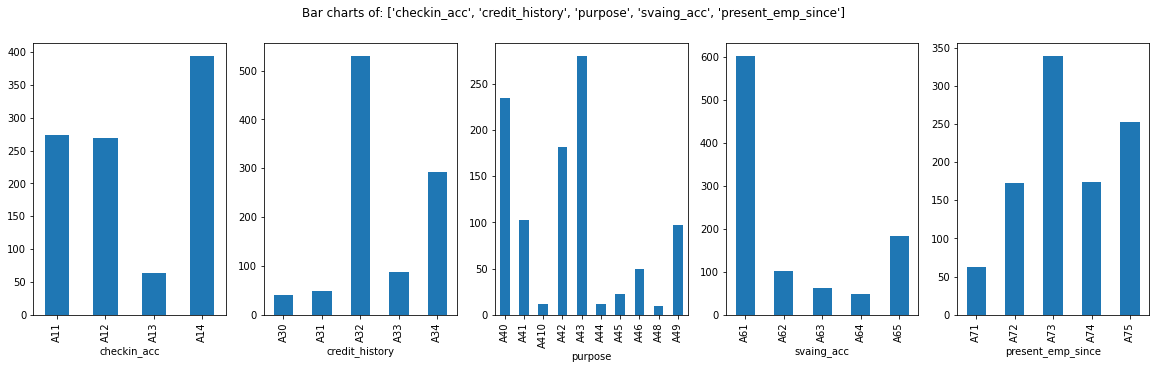

In [9]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['checkin_acc', 'credit_history', 'purpose','svaing_acc','present_emp_since'])

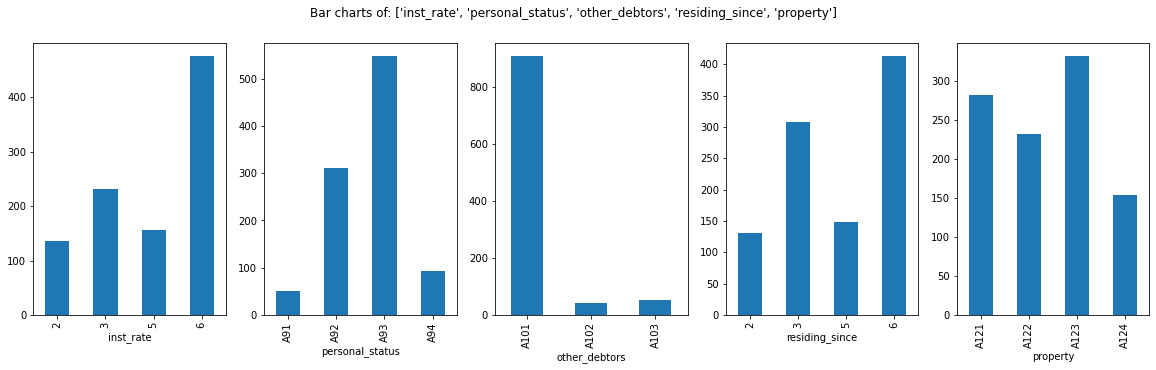

In [10]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['inst_rate', 'personal_status', 'other_debtors','residing_since', 'property'])

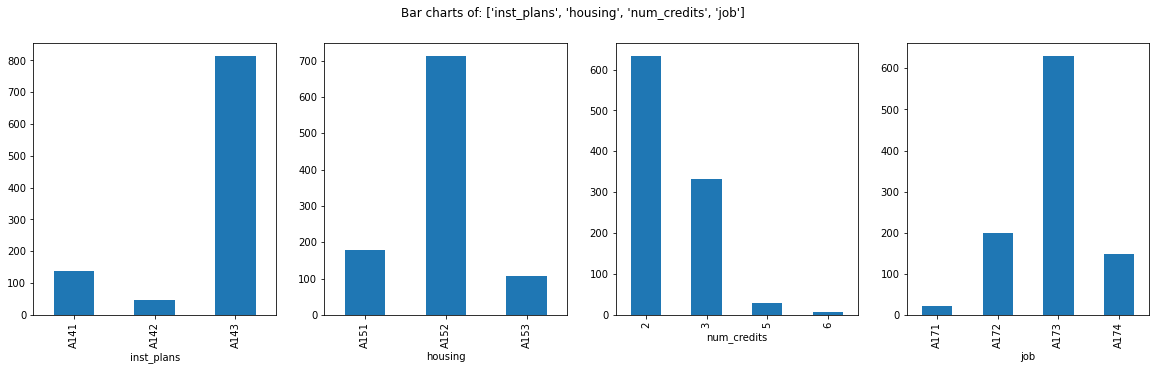

In [11]:
# Calling the function for 4 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['inst_plans', 'housing', 'num_credits', 'job'])

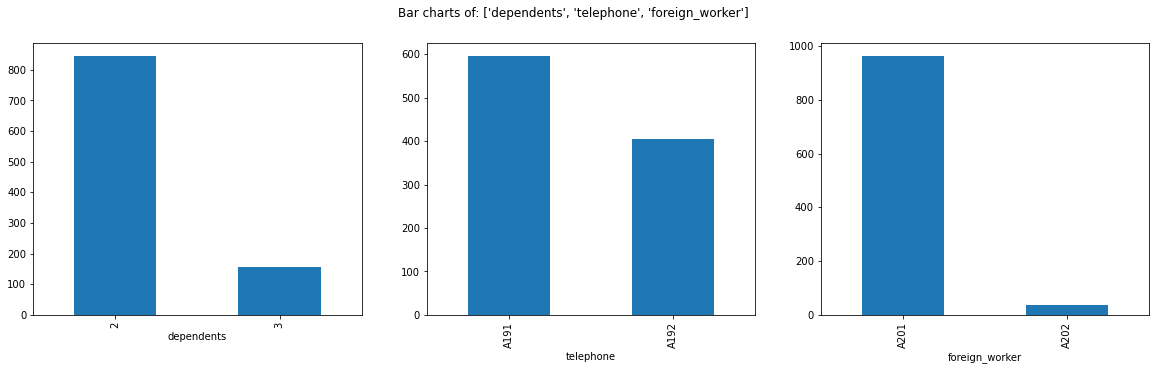

In [12]:
# Calling the function for 3 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['dependents', 'telephone', 'foreign_worker'])

Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, There are Three continuous predictor variables 'duration', 'amount',and 'age'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CED4661520>,
      dtype=object)

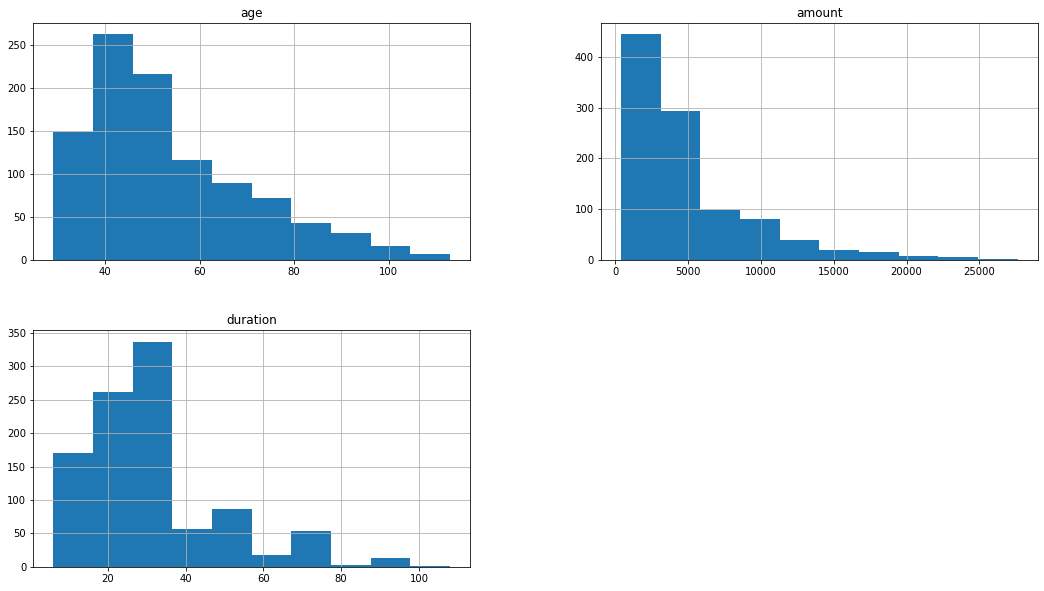

In [13]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
CreditRiskData.hist(['age', 'amount','duration'], figsize=(18,10))

Missing values treatment

In [14]:
# Finding how many missing values are there for each column
CreditRiskData.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

Relationship exploration: Categorical Vs Continuous -- Box Plots

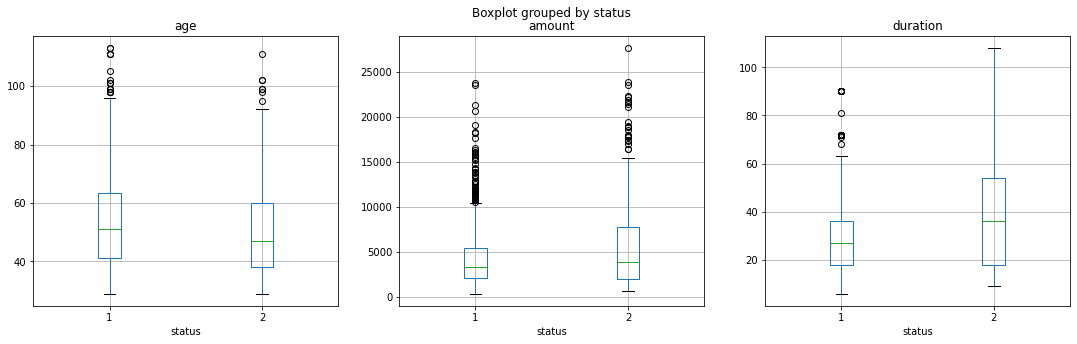

In [15]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CreditRiskData.boxplot(column=PredictorCol, by='status', figsize=(5,5), vert=True, ax=PlotCanvas[i])

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [16]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [17]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=CreditRiskData, TargetVariable='status', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with status | P-Value: 0.004054058455596573
amount is correlated with status | P-Value: 8.796630616676277e-07
duration is correlated with status | P-Value: 6.883579432112806e-12


['age', 'amount', 'duration']

Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

In [18]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=CreditRiskData['checkin_acc'], columns=CreditRiskData['status'])
CrossTabResult

status         1    2
checkin_acc          
A11          139  135
A12          164  105
A13           49   14
A14          348   46

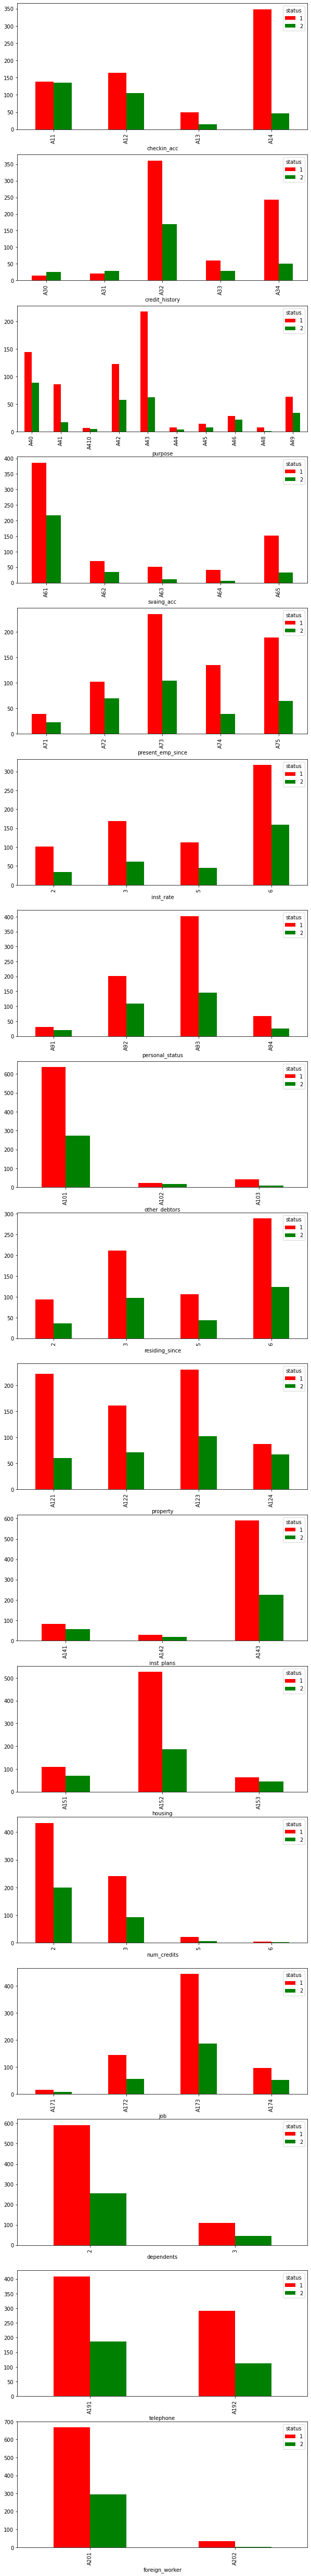

In [19]:
CategoricalColsList=['checkin_acc', 'credit_history', 'purpose','svaing_acc','present_emp_since',
                     'inst_rate', 'personal_status', 'other_debtors','residing_since', 'property',
                     'inst_plans', 'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditRiskData[CategoricalCol], columns=CreditRiskData['status'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])

Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [20]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [21]:
CategoricalVariables=['checkin_acc', 'credit_history', 'purpose','svaing_acc','present_emp_since',
                     'inst_rate', 'personal_status', 'other_debtors','residing_since', 'property',
                     'inst_plans', 'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']

# Calling the function
FunctionChisq(inpData=CreditRiskData, 
              TargetVariable='status',
              CategoricalVariablesList= CategoricalVariables)

checkin_acc is correlated with status | P-Value: 1.2189020722893755e-26
credit_history is correlated with status | P-Value: 1.2791872956751013e-12
purpose is correlated with status | P-Value: 0.00011574910079691586
svaing_acc is correlated with status | P-Value: 2.7612142385682596e-07
present_emp_since is correlated with status | P-Value: 0.001045452349140254
inst_rate is NOT correlated with status | P-Value: 0.1400333122128481
personal_status is correlated with status | P-Value: 0.02223800546926877
other_debtors is correlated with status | P-Value: 0.036055954027247226
residing_since is NOT correlated with status | P-Value: 0.8615521320413175
property is correlated with status | P-Value: 2.8584415733250017e-05
inst_plans is correlated with status | P-Value: 0.0016293178186473534
housing is correlated with status | P-Value: 0.00011167465374597684
num_credits is NOT correlated with status | P-Value: 0.4451440800083001
job is NOT correlated with status | P-Value: 0.5965815918843431
depen

['checkin_acc',
 'credit_history',
 'purpose',
 'svaing_acc',
 'present_emp_since',
 'personal_status',
 'other_debtors',
 'property',
 'inst_plans',
 'housing',
 'foreign_worker']

Selecting final predictors for Machine Learning

In [22]:
SelectedColumns=['checkin_acc','credit_history','purpose','svaing_acc','present_emp_since',
 'personal_status','other_debtors','property','inst_plans','housing','foreign_worker',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

checkin_acc credit_history purpose svaing_acc present_emp_since  \
0         A11            A34     A43        A65               A75   
1         A12            A32     A43        A61               A73   
2         A14            A34     A46        A61               A74   
3         A11            A32     A42        A61               A74   
4         A11            A33     A40        A61               A73   

  personal_status other_debtors property inst_plans housing foreign_worker  \
0             A93          A101     A121       A143    A152           A201   
1             A92          A101     A121       A143    A152           A201   
2             A93          A101     A121       A143    A152           A201   
3             A93          A103     A122       A143    A153           A201   
4             A93          A101     A124       A143    A153           A201   

   age  amount  duration  
0  101    1754         9  
1   33    8927        72  
2   74    3144        18  
3   68   11823        63  
4   80    7305        36

In [23]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

Data Pre-processing for Machine Learning

Converting Ordinal variables to numeric using business mapping

In [24]:
# Treating the Ordinal variable first
DataForML['present_emp_since'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

Converting the binary nominal variable to numeric using 1/0 mapping

In [25]:
# Treating the binary nominal variable
DataForML['foreign_worker'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()

checkin_acc credit_history purpose svaing_acc  present_emp_since  \
0         A11            A34     A43        A65                  5   
1         A12            A32     A43        A61                  3   
2         A14            A34     A46        A61                  4   
3         A11            A32     A42        A61                  4   
4         A11            A33     A40        A61                  3   

  personal_status other_debtors property inst_plans housing  foreign_worker  \
0             A93          A101     A121       A143    A152               1   
1             A92          A101     A121       A143    A152               1   
2             A93          A101     A121       A143    A152               1   
3             A93          A103     A122       A143    A153               1   
4             A93          A101     A124       A143    A153               1   

   age  amount  duration  
0  101    1754         9  
1   33    8927        72  
2   74    3144        18  
3   68   11823        63  
4   80    7305        36

Converting nominal variables to numeric using get_dummies()

In [26]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['status']=CreditRiskData['status']

# Printing sample rows
DataForML_Numeric.head()

present_emp_since  foreign_worker  age  amount  duration  checkin_acc_A11  \
0                  5               1  101    1754         9                1   
1                  3               1   33    8927        72                0   
2                  4               1   74    3144        18                0   
3                  4               1   68   11823        63                1   
4                  3               1   80    7305        36                1   

   checkin_acc_A12  checkin_acc_A13  checkin_acc_A14  credit_history_A30  ...  \
0                0                0                0                   0  ...   
1                1                0                0                   0  ...   
2                0                0                1                   0  ...   
3                0                0                0                   0  ...   
4                0                0                0                   0  ...   

   property_A122  property_A123  property_A124  inst_plans_A141  \
0              0              0              0                0   
1              0              0              0                0   
2              0              0              0                0   
3              1              0              0                0   
4              0              0              1                0   

   inst_plans_A142  inst_plans_A143  housing_A151  housing_A152  housing_A153  \
0                0                1             0             1             0   
1                0                1             0             1             0   
2                0                1             0             1             0   
3                0                1             0             0             1   
4                0                1             0             0             1   

   status  
0       1  
1       2  
2       1  
3       1  
4       2  

[5 rows x 47 columns]

Machine Learning: Splitting the data into Training and Testing sample

In [27]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['present_emp_since', 'foreign_worker', 'age', 'amount', 'duration',
       'checkin_acc_A11', 'checkin_acc_A12', 'checkin_acc_A13',
       'checkin_acc_A14', 'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'svaing_acc_A61', 'svaing_acc_A62',
       'svaing_acc_A63', 'svaing_acc_A64', 'svaing_acc_A65',
       'personal_status_A91', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'other_debtors_A101', 'other_debtors_A102',
       'other_debtors_A103', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'inst_plans_A141', 'inst_plans_A142',
       'inst_plans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'status'],
      dtype='object')

In [28]:
# Separate Target Variable and Predictor Variables
TargetVariable='status'
Predictors=['present_emp_since', 'foreign_worker', 'age', 'amount', 'duration',
       'checkin_acc_A11', 'checkin_acc_A12', 'checkin_acc_A13',
       'checkin_acc_A14', 'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'svaing_acc_A61', 'svaing_acc_A62',
       'svaing_acc_A63', 'svaing_acc_A64', 'svaing_acc_A65',
       'personal_status_A91', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'other_debtors_A101', 'other_debtors_A102',
       'other_debtors_A103', 'property_A121', 'property_A122', 'property_A123',
       'property_A124', 'inst_plans_A141', 'inst_plans_A142',
       'inst_plans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

Standardization/Normalization of data

In [29]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


Logistic Regression

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           1       0.80      0.90      0.85       209
           2       0.68      0.47      0.56        91

    accuracy                           0.77       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

[[189  20]
 [ 48  43]]
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.78666667 0.66403326 0.75159817 0.71776316 0.76028751 0.80460526
 0.63733333 0.77519841 0.77229833 0.74294671]

Final Average Accuracy of the model: 0.74


Decision Trees

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           1       0.75      0.85      0.79       209
           2       0.49      0.34      0.40        91

    accuracy                           0.69       300
   macro avg       0.62      0.59      0.60       300
weighted avg       0.67      0.69      0.68       300

[[177  32]
 [ 60  31]]
Accuracy of the model on Testing Sample Data: 0.68

Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7


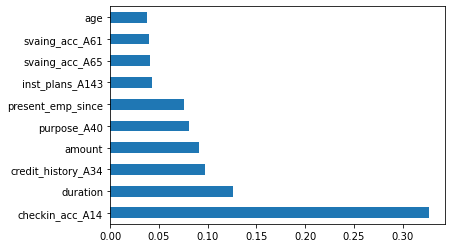

In [32]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Plotting a Decision Tree

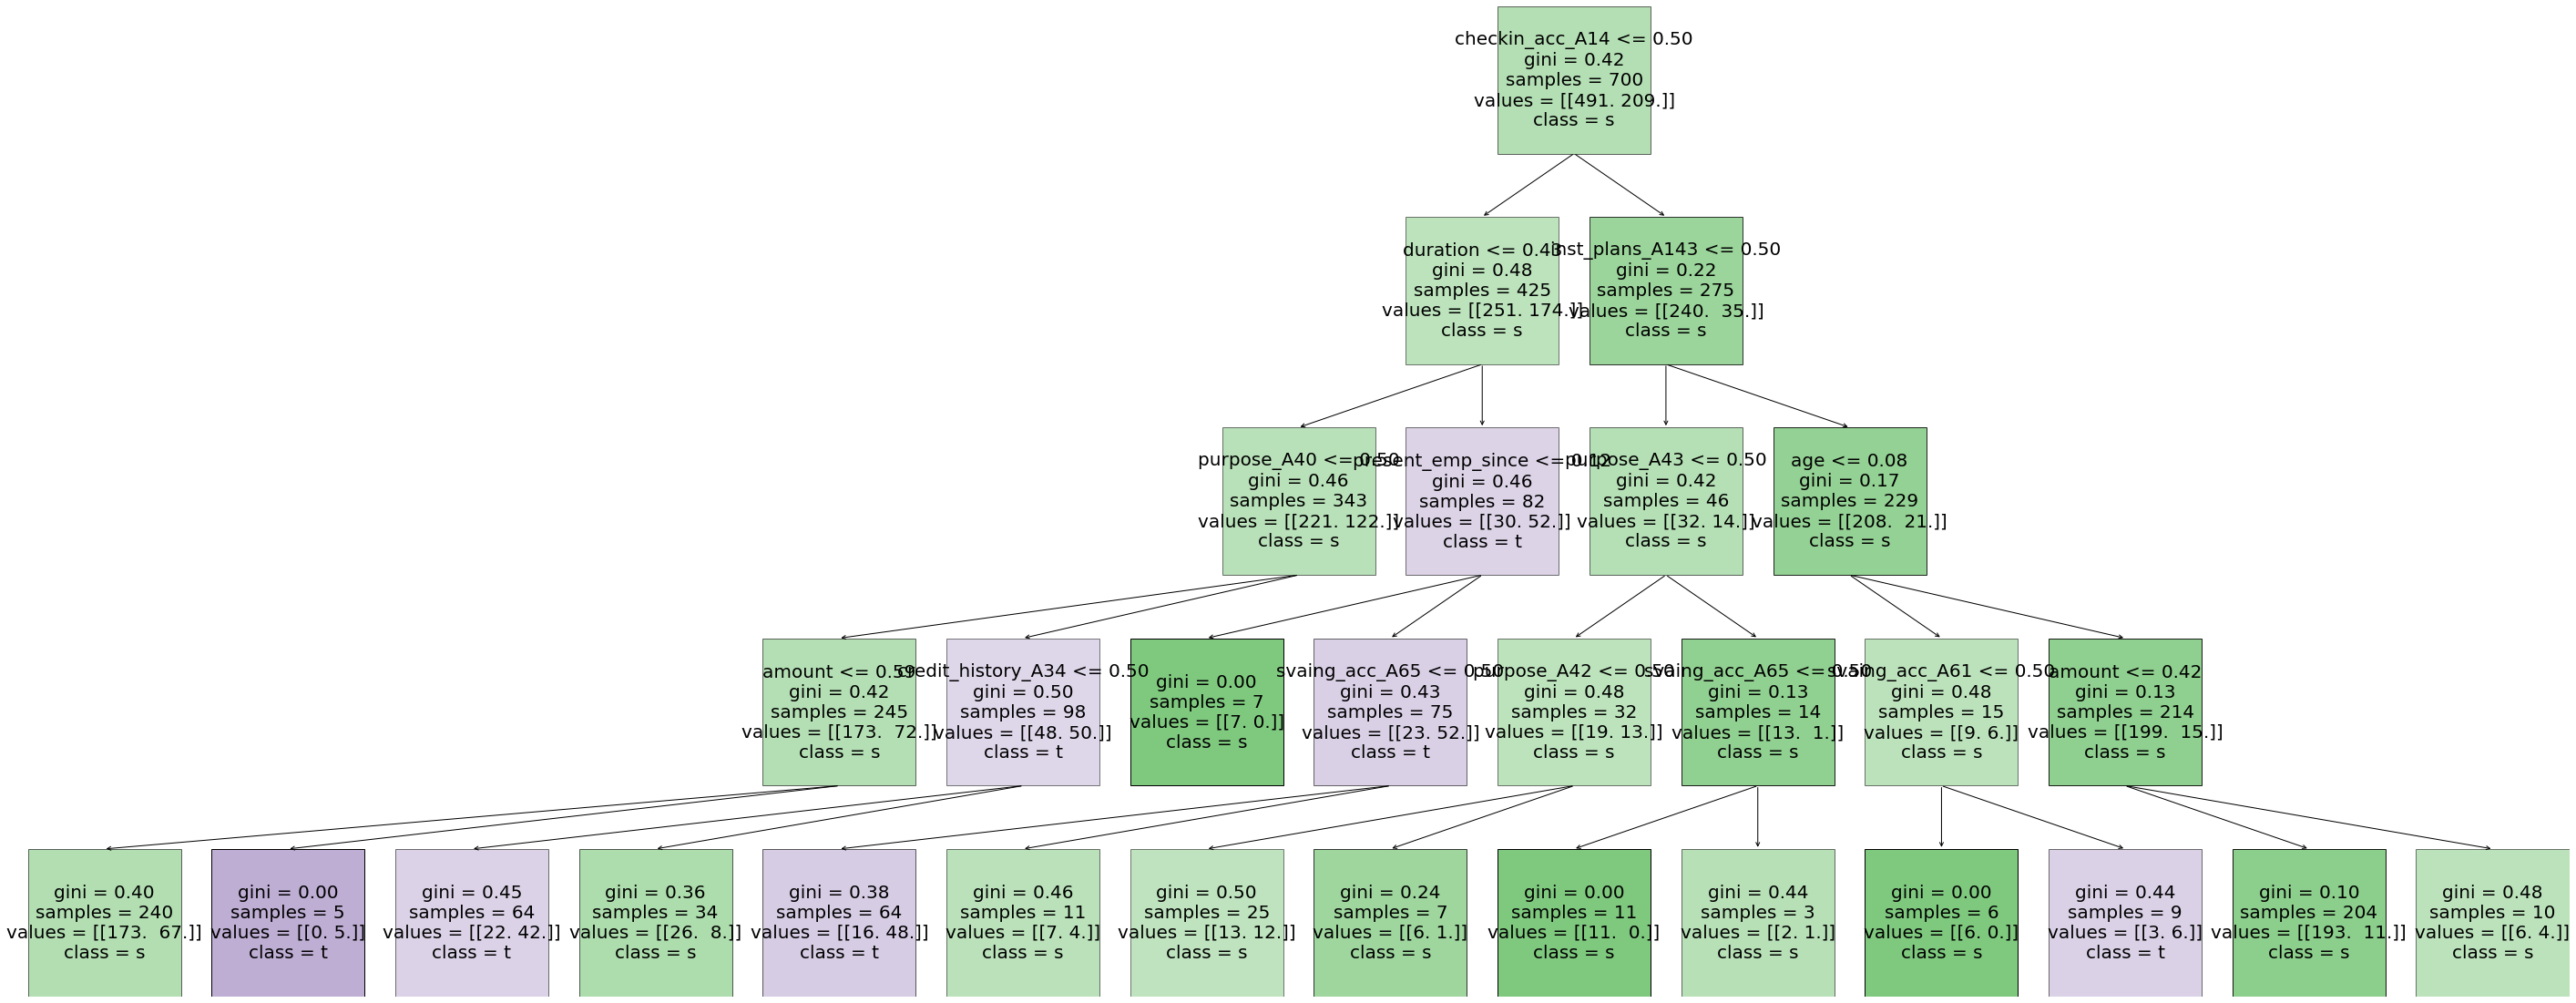

In [33]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           1       0.76      0.95      0.85       209
           2       0.73      0.33      0.45        91

    accuracy                           0.76       300
   macro avg       0.75      0.64      0.65       300
weighted avg       0.75      0.76      0.73       300

[[198  11]
 [ 61  30]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.84802632 0.73438735 0.72238245 0.73947368 0.73438735 0.73698711
 0.66083916 0.808      0.69605263 0.76533333]

Final Average Accuracy of the model: 0.74


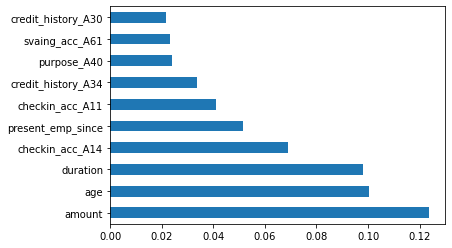

In [34]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

Plotting one of the Decision Trees in Random Forest

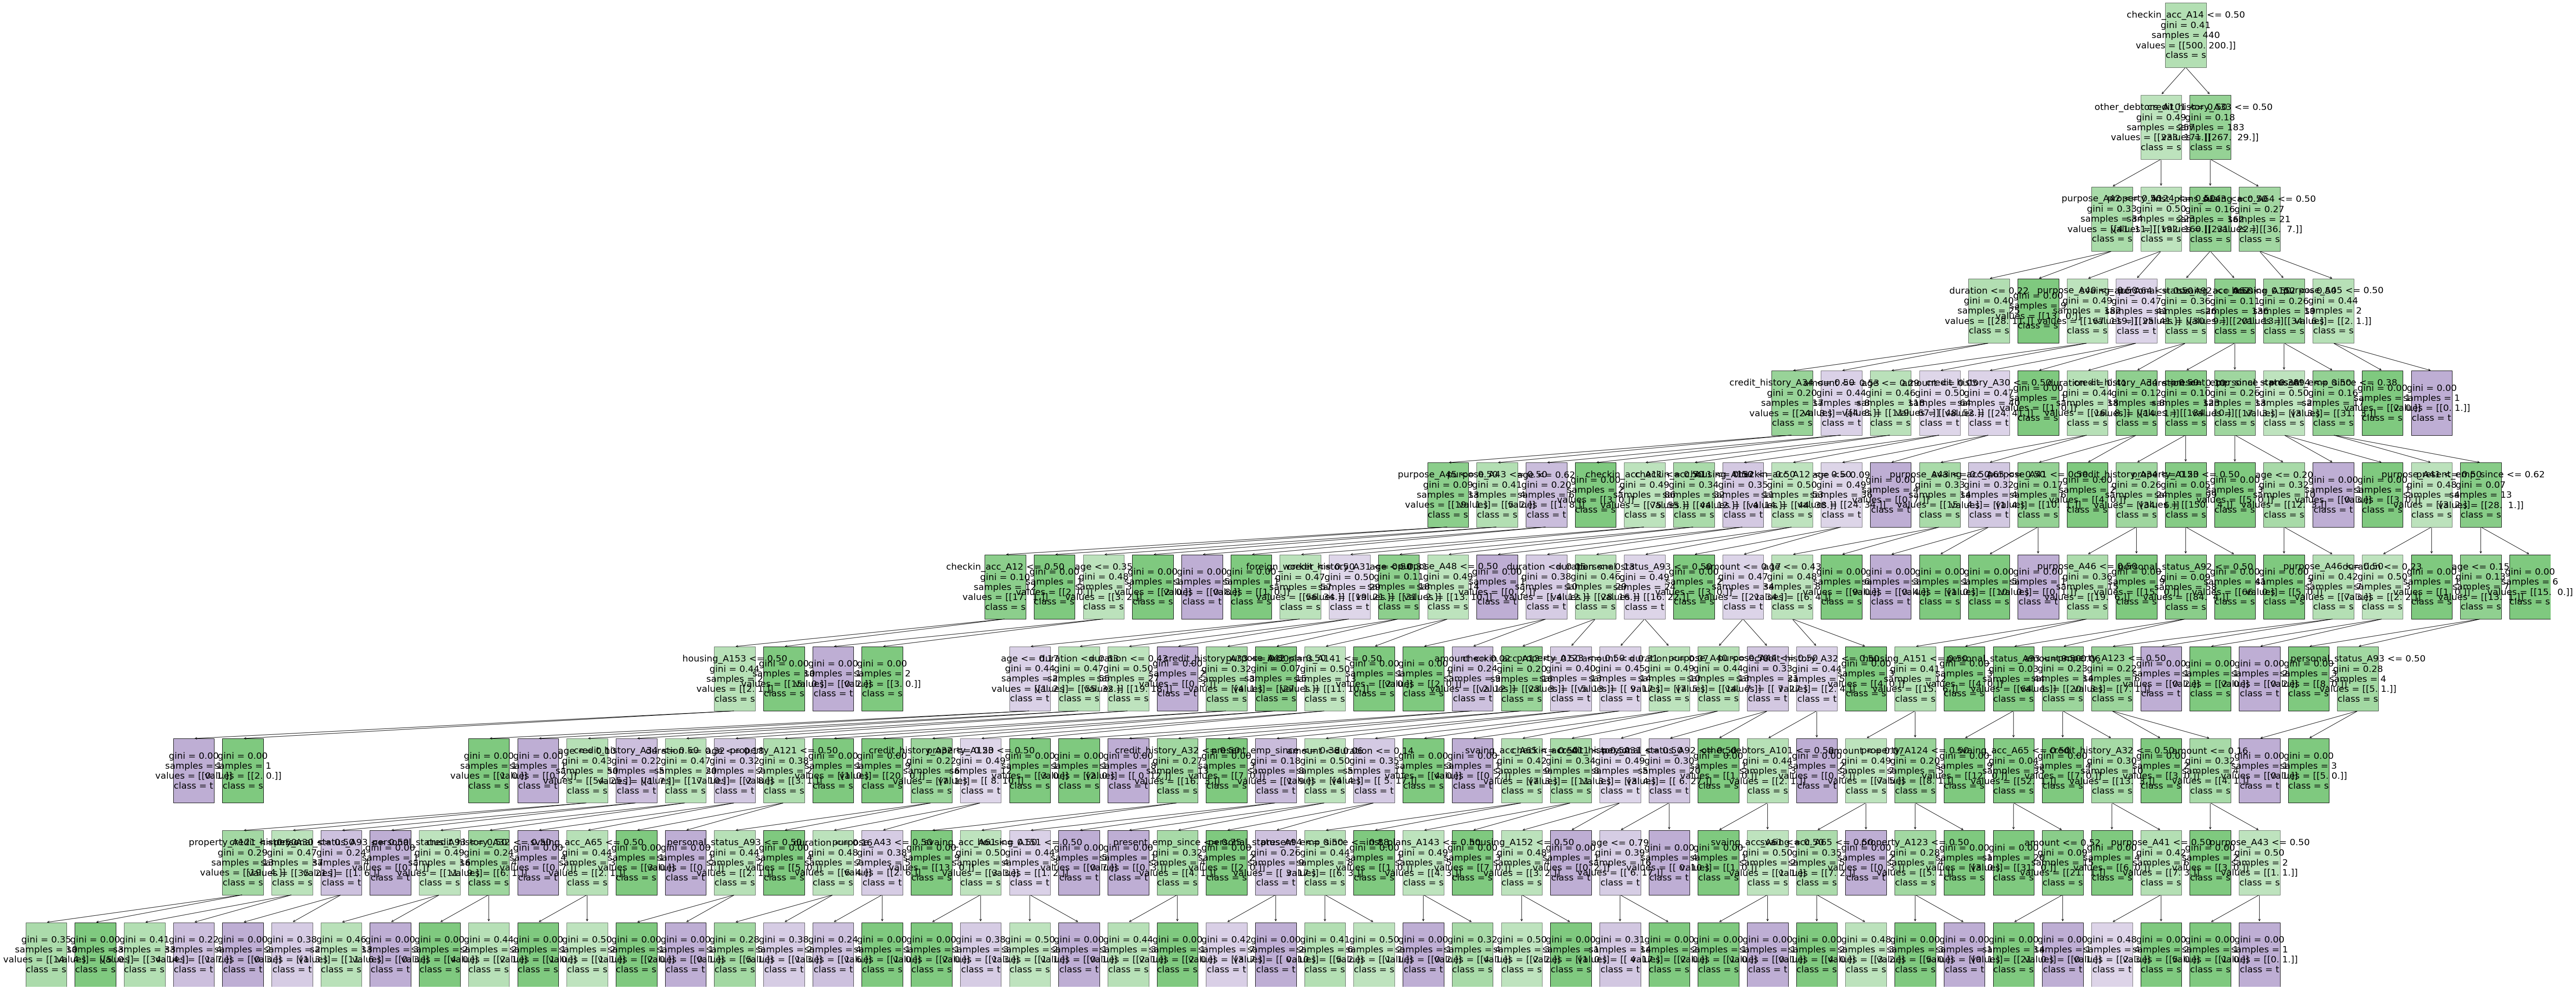

In [35]:
# max_depth=10 is too large to be plot here

# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(100,40)
# Double click on the graph to zoom in

AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       209
           2       0.63      0.43      0.51        91

    accuracy                           0.75       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.74      0.75      0.73       300

[[186  23]
 [ 52  39]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.75256116 0.69605263 0.7257269  0.76987902 0.75256116 0.77781287
 0.67434211 0.73947368 0.77781287 0.74796273]

Final Average Accuracy of the model: 0.74


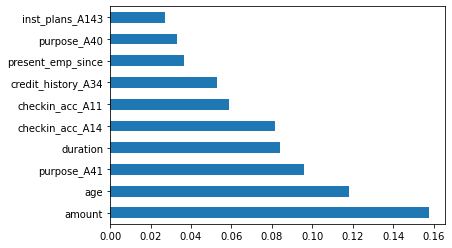

In [36]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

Plotting one of the Decision trees from Adaboost

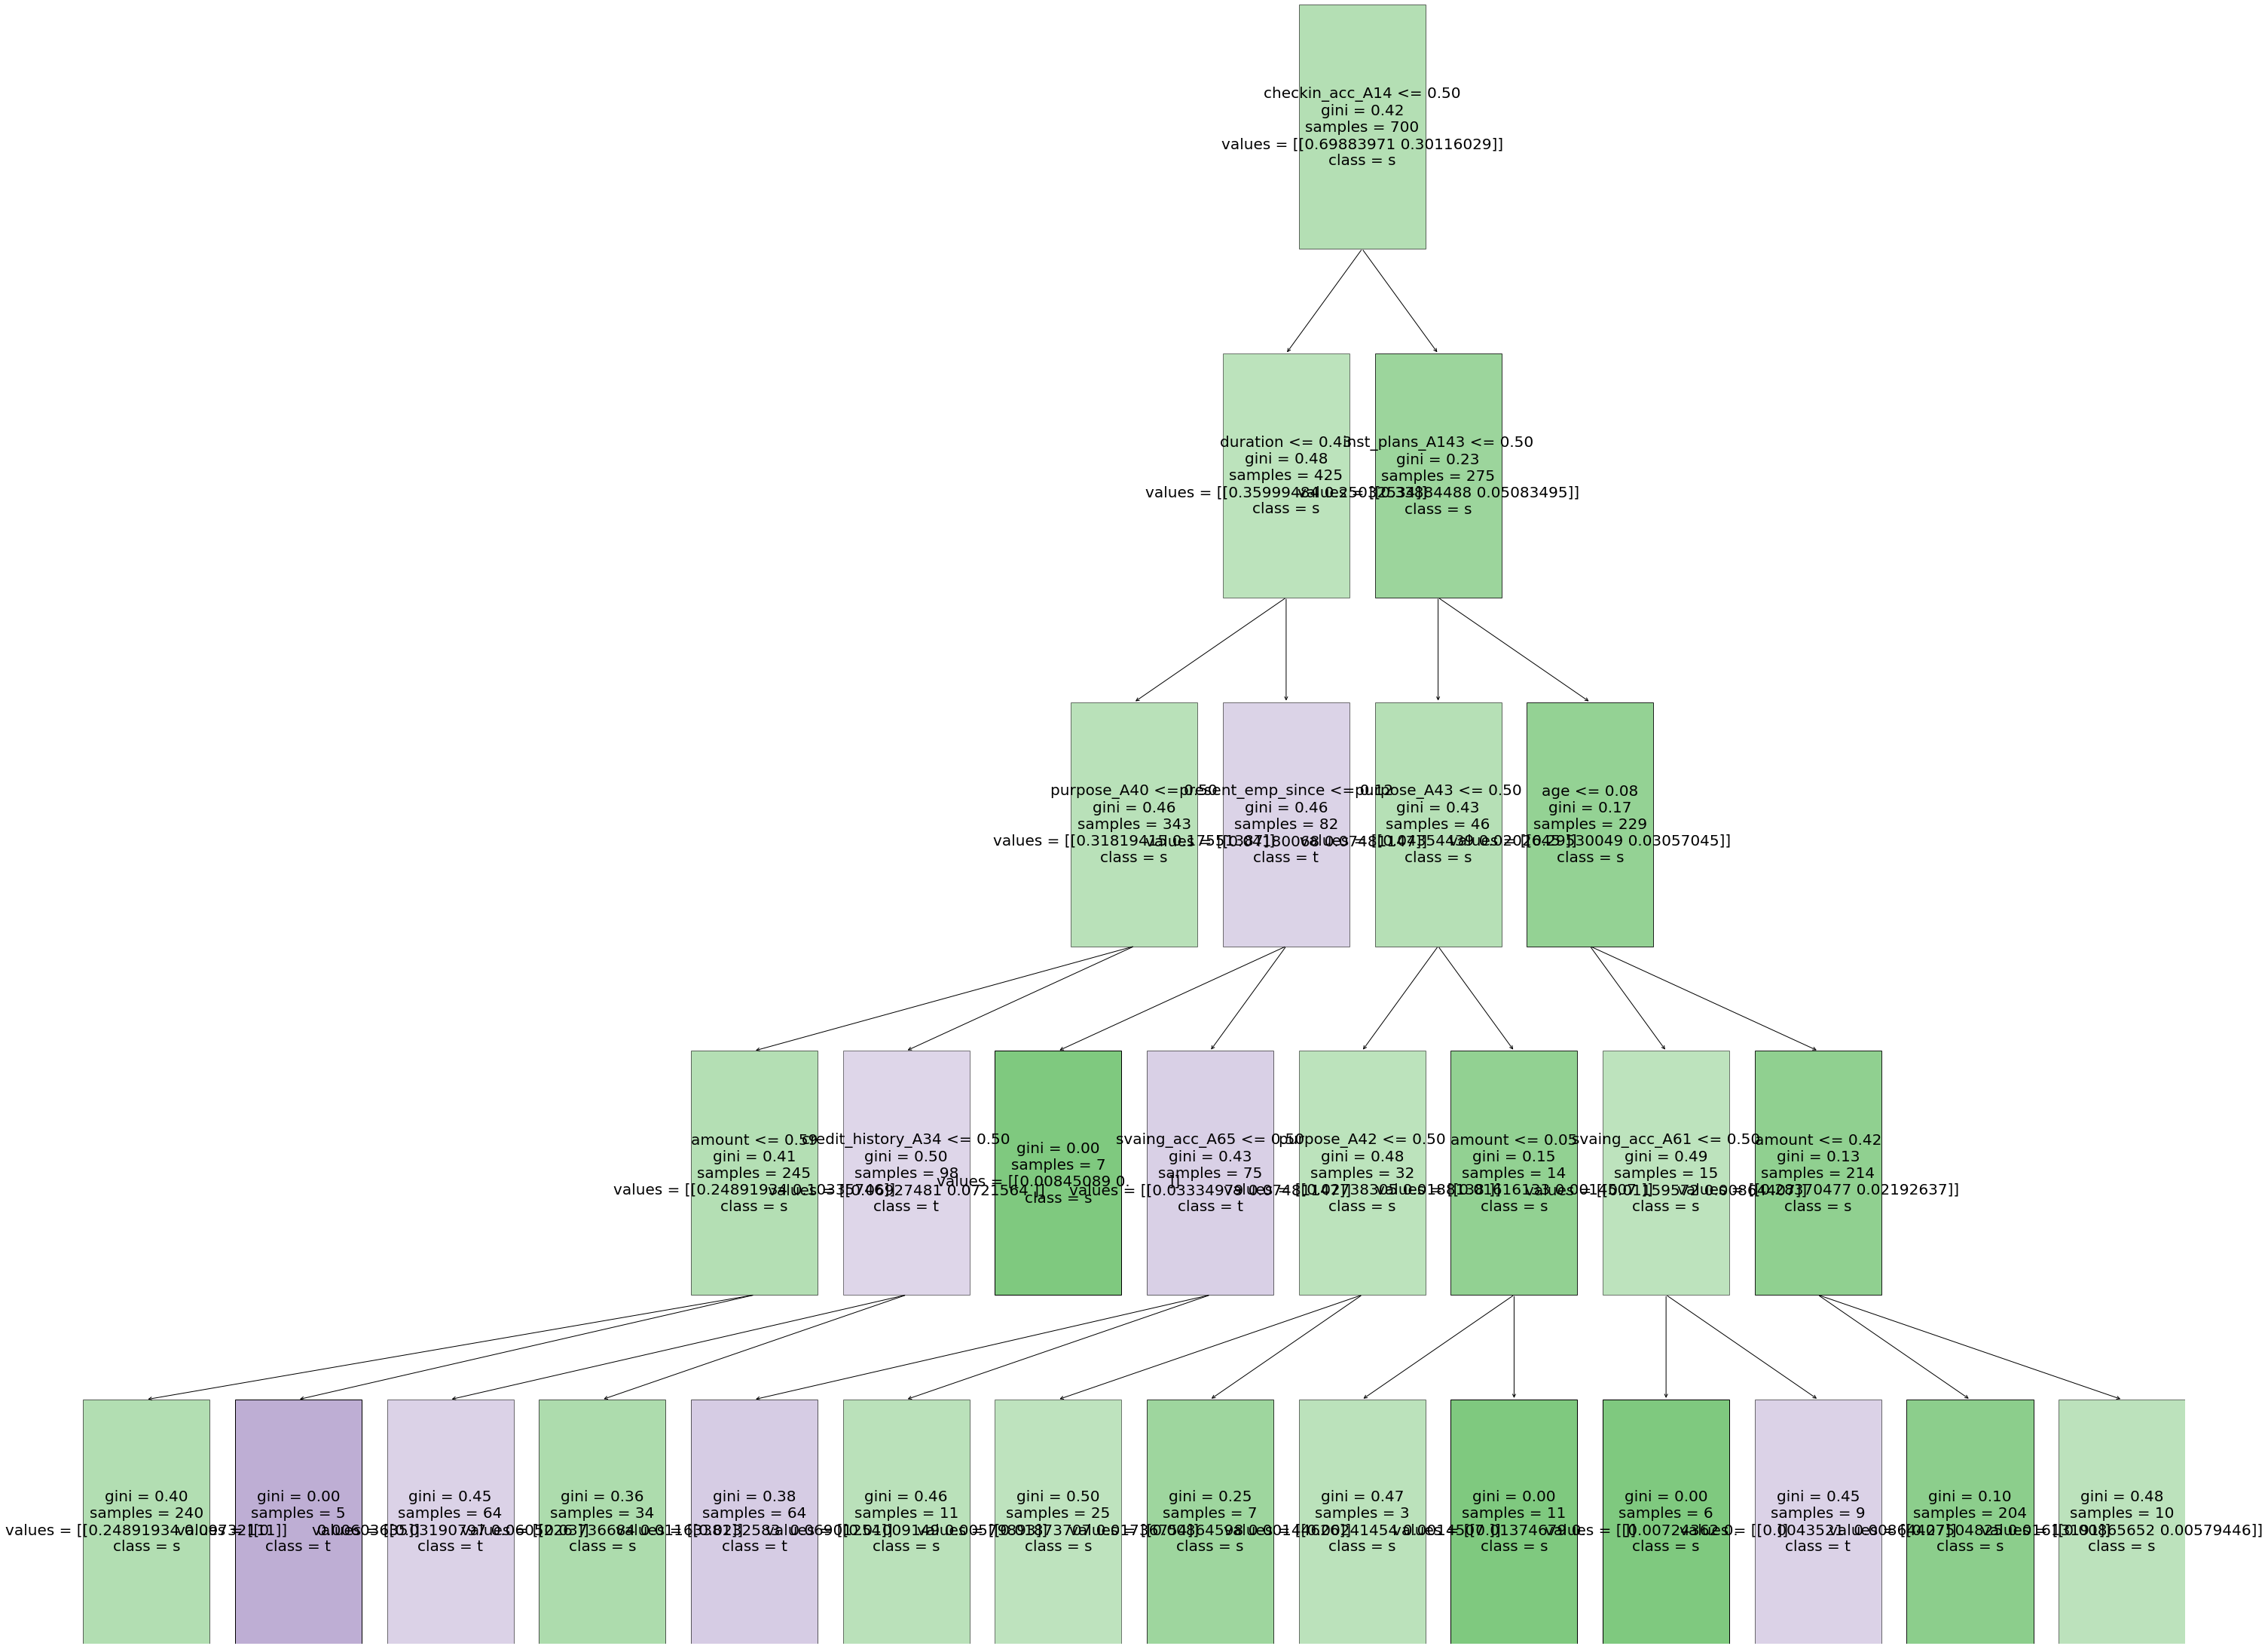

In [37]:
# PLotting 4th single Decision Tree from Adaboost
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[1], feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,40)
# Double click on the graph to zoom in

XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[20:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

 

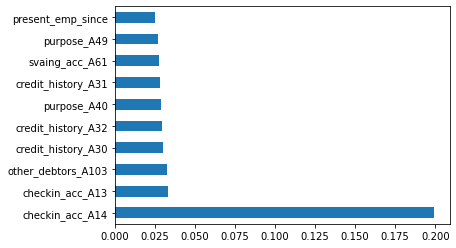

In [38]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

Plotting a single Decision tree out of XGBoost

In [39]:
# max_depth=10 is too large to be plot here

#from xgboost import plot_tree
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(100, 40))
#xgboost.plot_tree(XGB, num_trees=10, ax=ax)
# Double click on the graph to zoom in

KNN

In [40]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.79      0.86      0.82       209
           2       0.60      0.47      0.53        91

    accuracy                           0.74       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300

[[180  29]
 [ 48  43]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.73549151 0.6508488  0.66649547 0.74604343 0.70541038 0.78289474
 0.66879756 0.67301587 0.66879756 0.7257269 ]

Final Average Accuracy of the model: 0.7


SVM

In [41]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           1       0.78      0.89      0.83       209
           2       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.71019787 0.73089802 0.76533333 0.77229833 0.74796273
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


Naive Bayes

In [42]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           1       0.85      0.72      0.78       209
           2       0.52      0.70      0.60        91

    accuracy                           0.71       300
   macro avg       0.68      0.71      0.69       300
weighted avg       0.75      0.71      0.72       300

[[150  59]
 [ 27  64]]
Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.7109375  0.51596639 0.7        0.71895121 0.76397059 0.74599729
 0.65466893 0.74430147 0.74599729 0.73833389]

Final Average Accuracy of the model: 0.7


Deployment of the Model

Choosing only the most important variables

In [43]:
# Separate Target Variable and Predictor Variables
TargetVariable='status'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['present_emp_since', 'age', 'amount', 'duration','checkin_acc_A11',
        'checkin_acc_A12', 'checkin_acc_A13','checkin_acc_A14',
       'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'svaing_acc_A61', 'svaing_acc_A62',
       'svaing_acc_A63','svaing_acc_A64', 'svaing_acc_A65',
       'personal_status_A91', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


Retraining the model using 100% data

In [44]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X,y)

Cross validating the final model accuracy with less predictors

In [45]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.795594   0.68       0.71388889 0.72867133 0.73089802 0.77407758
 0.67690925 0.80197664 0.73104474 0.74802495]

Final Average Accuracy of the model: 0.74


Save the model as a serialized file which can be stored anywhere

In [46]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Deepu Pillai\EY_ case study


Create a python function

In [47]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['present_emp_since'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['present_emp_since', 'age', 'amount', 'duration','checkin_acc_A11',
        'checkin_acc_A12', 'checkin_acc_A13','checkin_acc_A14',
       'credit_history_A30', 'credit_history_A31',
       'credit_history_A32', 'credit_history_A33', 'credit_history_A34',
       'purpose_A40', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'svaing_acc_A61', 'svaing_acc_A62',
       'svaing_acc_A63','svaing_acc_A64', 'svaing_acc_A65',
       'personal_status_A91', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        AdaBoost_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=AdaBoost_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [48]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['present_emp_since', 'age', 'amount', 'duration','checkin_acc', 
             'credit_history', 'purpose', 'svaing_acc','personal_status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  present_emp_since  age  amount  duration checkin_acc credit_history purpose  \
0               A73   22    5951        48         A12            A32     A43   
1               A72   40    8951        24         A12            A32     A43   

  svaing_acc personal_status  
0        A61             A92  
1        A61             A92  


Predicted Status
0                 1
1                 1

Deploying a predictive model as an API

Function for predictions API

In [49]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_present_emp_since, inp_age , inp_amount, inp_duration,
                           inp_checkin_acc,inp_credit_history, inp_purpose, 
                           inp_svaing_acc, inp_personal_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_present_emp_since, inp_age , inp_amount, inp_duration,
                           inp_checkin_acc,inp_credit_history, inp_purpose, 
                           inp_svaing_acc, inp_personal_status]],
     columns=['present_emp_since', 'age', 'amount', 'duration','checkin_acc', 
             'credit_history', 'purpose', 'svaing_acc','personal_status'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_present_emp_since='A73', 
                       inp_age= 22, 
                       inp_amount=5951,
                       inp_duration=48,
                       inp_checkin_acc='A12',
                       inp_credit_history='A32',
                       inp_purpose='A43',
                       inp_svaing_acc='A61',
                       inp_personal_status='A92')

'{"Predicted Status":{"0":1}}'

Creating Flask API

In [50]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [51]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        employ_value = request.args.get('employ')
        age_value = float(request.args.get('age'))
        amount_value=float(request.args.get('amount'))
        duration_value=float(request.args.get('duration'))
        checkingstatus_value=request.args.get('checkingstatus')
        history_value=request.args.get('history')
        purpose_value=request.args.get('purpose')
        savings_value=request.args.get('savings')
        status_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(
                       inp_employ=employ_value, 
                       inp_age= age_value, 
                       inp_amount=amount_value,
                       inp_duration=duration_value,
                       inp_checkingstatus=checkingstatus_value,
                       inp_history=history_value,
                       inp_purpose=purpose_value,
                       inp_savings=savings_value,
                       inp_status=status_value)

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

Starting the API engine

In [52]:
#import os
#if __name__ =="__main__":
    
    # Hosting the API in localhost
#    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API